# Initialization

In [1]:
%cd ../covid_households
import recipes as recipes
from settings import model_constants
from settings import STATE
import numpy as np

/Users/thayer/covid_households/covid_households


In [2]:
import pandas as pd
pd.set_option('mode.chained_assignment', 'raise')

In [3]:
rebuild = False
if rebuild:

    from_parts_dirs = [
        # part 1
        '/Users/thayer/covid_households/new_parameters/s80-p80-SAR-sizes-2-8-tweaked-dprobability/group1/experiment-03-30-01-25',
        '/Users/thayer/covid_households/new_parameters/s80-p80-SAR-sizes-2-8-tweaked-dprobability/group1/experiment-03-31-01-57',
        '/Users/thayer/covid_households/new_parameters/s80-p80-SAR-sizes-2-8-tweaked-dprobability/group1/experiment-04-01-02-25',
        # part 2
        '/Users/thayer/covid_households/new_parameters/s80-p80-SAR-sizes-2-8-tweaked-dprobability/group2/experiment-03-31-01-57',
        '/Users/thayer/covid_households/new_parameters/s80-p80-SAR-sizes-2-8-tweaked-dprobability/group2/experiment-04-11-22-52',
        '/Users/thayer/covid_households/new_parameters/s80-p80-SAR-sizes-2-8-tweaked-dprobability/group2/experiment-04-12-16-06',
    ]

    completed_dirs = [
        # part 1
        '/Users/thayer/covid_households/new_parameters/s80-p80-SAR-sizes-2-8-tweaked-dprobability/group1/experiment-04-04-02-27',
        '/Users/thayer/covid_households/new_parameters/s80-p80-SAR-sizes-2-8-tweaked-dprobability/group1/experiment-04-05-21-13',
        '/Users/thayer/covid_households/new_parameters/s80-p80-SAR-sizes-2-8-tweaked-dprobability/group1/experiment-04-13-01-29',
        # part 2
        '/Users/thayer/covid_households/new_parameters/s80-p80-SAR-sizes-2-8-tweaked-dprobability/group2/experiment-04-01-02-25',
        '/Users/thayer/covid_households/new_parameters/s80-p80-SAR-sizes-2-8-tweaked-dprobability/group2/experiment-04-02-00-50',
        '/Users/thayer/covid_households/new_parameters/s80-p80-SAR-sizes-2-8-tweaked-dprobability/group2/experiment-04-12-12-47',
        '/Users/thayer/covid_households/new_parameters/s80-p80-SAR-sizes-2-8-tweaked-dprobability/group2/experiment-04-12-15-52',
        '/Users/thayer/covid_households/new_parameters/s80-p80-SAR-sizes-2-8-tweaked-dprobability/group2/experiment-04-12-17-36',
        '/Users/thayer/covid_households/new_parameters/s80-p80-SAR-sizes-2-8-tweaked-dprobability/group2/experiment-04-12-23-06',
        '/Users/thayer/covid_households/new_parameters/s80-p80-SAR-sizes-2-8-tweaked-dprobability/group2/experiment-04-12-23-07'
    ]
    r_objs = []
    for dir in from_parts_dirs:
        r = recipes.Results.load(dir, from_parts=True)
        r_objs.append(r)

    for dir in completed_dirs:
        r = recipes.Results.load(dir)
        r_objs.append(r)

    cumulative_r = None
    for r in r_objs:
        if cumulative_r is None:
            cumulative_r = r
        else:
            cumulative_r = cumulative_r.combine(r)
        #import pdb; pdb.set_trace()
        #for l in ['s80', 'p80', 'SAR']:
        #    print(l, np.unique(cumulative_r.df.index.get_level_values(l)))
        #print("NEXT\n")

    cumulative_r.save('/Users/thayer/covid_households/new_parameters/s80-p80-SAR-sizes-2-8-tweaked-dprobability', filename='results')
    results = cumulative_r

    s80_axis = np.linspace(0.20, 0.80, 31)
    p80_axis = np.linspace(0.20, 0.80, 31)
    sar_axis = np.linspace(0.10, 0.60, 51)
    axes_by_key = {'s80':s80_axis, 'p80':p80_axis, 'SAR':sar_axis}

    missing = results.check_sizes_on_axes(axes_by_key, range(2,9))
    if missing:
        raise Exception('some sizes are missing from some points in parameter space. Check `missing` object')
else:
    results = recipes.Results.load('/Users/thayer/covid_households/new_parameters/s80-p80-SAR-sizes-2-8-tweaked-dprobability')

In [4]:
results.find_frequencies(inplace=True)

s80  p80  SAR  size  infections
0.2  0.2  0.1  2     1             0.94572
                     2             0.05428
               3     1             0.88874
                     2             0.09174
                     3             0.01952
                                    ...   
0.8  0.8  0.6  8     4             0.00008
                     5             0.00002
                     6             0.00038
                     7             0.00928
                     8             0.98356
Name: count, Length: 1715384, dtype: float64

# Junk

In [5]:
def resample_freqs(s, n):
    return results.resample((0.5, 0.5, 0.24), {s:n})['count']/n

i1 = resample_freqs(8, 50000)
i2 = resample_freqs(8, 50000)

i1, i2

(trial  sample s80  sample p80  sample SAR  size  infections
 0      0.5         0.5         0.24        8     1             0.28304
                                                  2             0.10254
                                                  3             0.07590
                                                  4             0.07076
                                                  5             0.08954
                                                  6             0.11552
                                                  7             0.14434
                                                  8             0.11836
 Name: count, dtype: float64,
 trial  sample s80  sample p80  sample SAR  size  infections
 0      0.5         0.5         0.24        8     1             0.27868
                                                  2             0.10058
                                                  3             0.07504
                                                  4     

In [6]:
np.average(((i1 - i2)/i1)*100)

-0.6780648167920851

# Violin figures

`null_freqs` represents the frequencies we observe in the absence of heterogeneity. We use it to calculate the MLE along the restriction where heterogeneity is not present.

In [7]:
freq = results.df['frequency']
s80_l = freq.index.get_level_values(0)
p80_l = freq.index.get_level_values(1)

null_freqs = freq[(s80_l == 0.8) & (p80_l == 0.8)]
null_freqs

s80  p80  SAR  size  infections
0.8  0.8  0.1  2     1             0.90044
                     2             0.09956
               3     1             0.80784
                     2             0.16142
                     3             0.03074
                                    ...   
          0.6  8     4             0.00008
                     5             0.00002
                     6             0.00038
                     7             0.00928
                     8             0.98356
Name: frequency, Length: 1785, dtype: float64

In [5]:
def make_mles(logl, population, parameter_set, population_name=None):
    """Takes the log likelihood surface for each configuration and returns the MLEs (one for each trial).

    Args:
        logl (Pandas.DataFrame): the loglikelihood surface. Indexed by at least `trial` which represent different observations
        population (dict): a dictionary of household size --> number of households.
        parameter_set (tuple): the value of each parameter that in fact produced the simulated data

    Returns:
        Pandas.DataFrame: a dataframe of MLE values with one column for each parameter inferred
    """
    fits = logl.groupby('trial').idxmax()
    fits = pd.DataFrame(fits.tolist())
    new_names = []
    for name in logl.index.names:
        name = name if name == 'trial' else 'MLE_' + name
        new_names.append(name)
    fits.columns = new_names
    fits.set_index('trial')

    fits['sample size'] = sum([k*v for k,v in population.items()])
    if population_name is not None:
        fits['population mix'] = population_name
    else:
        fits['population mix'] = [tuple(population.keys()) for i in range(len(fits))]
    fits ['parameters'] = [parameter_set] * len(fits)
    return fits

Choose the different combinations of parameters / sample sizes / household sizes to try.

In [6]:
%cd /Users/thayer/covid_households/covid_households
import likelihood
sample_sizes = [15000]#, 5000, 10000]
parameter_sets = [(0.5, 0.5, 0.25), (0.3, 0.3, 0.25), (0.8, 0.4, 0.25), (0.4, 0.8, 0.25)]

#   Two  | Three	 Four     Five    Six    Seven or more
# 2021
# 45,515 | 19,523 | 16,098 | 7,577 | 2,635 |     1,611
# https://www.census.gov/data/tables/time-series/demo/families/households.html
# Let's take households of size > 2 and assume that 'seven or more' --> equal mix of 7 and 8
American_households_size_ge_3 = (19523 + 16098 + 7577 + 2635 + 1611)
America_total = {3:19523, 4:16098, 5:7577, 6:2635, 7:1611//2, 8:1611//2}
America_households_total = np.sum([v for v in America_total.values()])
named_populations = {'America_census':{k:v/America_households_total for k,v in America_total.items()}}
population_descriptions = {'America_census': 'divided in proportion to American households of size >=3'}


# A few other countries
# Percent 1 | 2-3 | 4-5 | 6+
# Philippines [2017] (average size = 4.23)
# 9.18	30.05	36.82	23.95
philippines_percents = [9.18, 30.05, 36.82, 23.95]
# Guatemala [2015] (average size = 5.23)
# 4.33	26.57	37.51	31.60
guatemala_percents = [4.33, 26.57, 37.51, 31.60]
guatemala_average = 5.23
# US [2015] (average size = 2.49)
# 27.89	49.49	18.81	3.81
us_percents = [27.89, 49.49, 18.81, 3.81]
# Mexico [2015] (Average size 3.74)
# 10.08	37.68	37.75	14.49
mexico_percents = [10.08, 37.68, 37.75, 14.49]

percent_buckets_left_side = [1, 2, 4, 6]
percent_buckets_right_side = [1, 3, 5, 9]

# Let's be dumb about it and just assume that you are evenly mixed within the bucket and that 6+ goes from 6-8.
# Don't anchor to the average, just calculate the residual

buckets = [(1,1), (2,3), (4,5), (6,8)]
def uniform_buckets(percents, left_cutoff=None):
    np_population = np.zeros(10)
    for i,bucket in enumerate(buckets):
        left, right = bucket
        average_percent = percents[i] / (right - left + 1)
        for size in range(left, right+1):
            np_population[size] = average_percent
    if left_cutoff is not None:
        np_population[:left_cutoff] = 0
        remaining_percent = np.sum(np_population)
        np_population = np_population * 100 / (remaining_percent)
    population = {}
    for size, percent in enumerate(np_population):
        if percent == 0:
            continue
        population[size] = percent/100
    return population

named_populations.update({
    'America_UN':uniform_buckets(us_percents, left_cutoff=3),
    'Mexico':uniform_buckets(mexico_percents, left_cutoff=3),
    'Philippines':uniform_buckets(philippines_percents, left_cutoff=3),
    'Guatemala':uniform_buckets(guatemala_percents, left_cutoff=3),
})

population_descriptions.update({
    'America_UN':'US households size >= 3 estimated from UN',
    'Mexico':'Mexican households size >= 3 estimated from UN',
    'Philippines':'Philippine households size >= 3 estimated from UN',
    'Guatemala':'Guatemalan households size >= 3 estimated from UN'
})

#population_mixes = [(8,), (4,5,6,7,8), 'America']
population_mixes = [(5,6,7,8), 'America_UN', 'Mexico', 'Philippines', 'Guatemala']

/Users/thayer/covid_households/covid_households


Run the fits at all the combinations (create the population sample using statistical resampling — not forward simulation). Aggregate fits against the full surface in `fits_dfs` and the fits on the restriction that there is no heterogeneity in `null_hypoth_fits_dfs`.

In [7]:
trials = 300

# a hypothesis is a theory about which parameters are involved. fits will be done separately for each hypothesis
hypotheses = {
    'all': ['s80', 'p80', 'SAR'],
    'SAR and infectivity vary': ['p80', 'SAR'],
    'SAR and susceptibility vary': ['s80', 'SAR'],
    'null hypothesis': ['SAR'],
}

def restrict_parameters(base_results, included_parameters):
    freqs = base_results.df['frequency'].copy()

    for parameter in set(base_results.metadata.parameters) - set(included_parameters):
        if parameter not in ['s80', 'p80']:
            raise ValueError("can't exclude SAR as it has no default hypothesis.")
        parameter_level = freqs.index.get_level_values(base_results.metadata.parameters.index(parameter))
        freqs = freqs[(parameter_level == 0.8)]

    return freqs


frequencies_by_hypothesis = {k: restrict_parameters(results, included_parameters) for k,included_parameters in hypotheses.items()}
from collections import defaultdict
fit_collections = defaultdict(list)

for sample_size in sample_sizes:
    for population_mix in population_mixes:
        population_name = None
        if isinstance(population_mix, str):
            population_name = population_mix
            population = named_populations[population_mix]
            print(population)
            population = {k:int(np.round((v * sample_size)//k)) for k,v in population.items()}
        else:
            population_per_size = sample_size // len(population_mix)
            population = {s:population_per_size//s for s in population_mix}
        for parameter_set in parameter_sets:
            print(parameter_set, population)
            samples = results.resample(parameter_set, population, trials=trials)
            for hypothesis_name, hypothesis_frequencies in frequencies_by_hypothesis.items():
                logl = likelihood.logl_from_frequencies_and_counts(hypothesis_frequencies, samples['count'], results.metadata.parameters)
                fits = make_mles(logl, population, parameter_set, population_name=population_name)

                normalized_probability = logl.groupby('trial').apply(lambda g: likelihood.normalize_probability(g))
                confidence_masks = normalized_probability.groupby('trial').apply(lambda g: likelihood.find_confidence_mask(g)).astype('bool')
                p80_confidence_intervals = confidence_masks.groupby('trial').apply(lambda g: likelihood.confidence_interval_from_confidence_mask(g, 'p80', include_endpoints=True))
                s80_confidence_intervals = confidence_masks.groupby('trial').apply(lambda g: likelihood.confidence_interval_from_confidence_mask(g, 's80', include_endpoints=True))
                SAR_confidence_intervals = confidence_masks.groupby('trial').apply(lambda g: likelihood.confidence_interval_from_confidence_mask(g, 'SAR', include_endpoints=True))

                fits['p80_interval'] = (p80_confidence_intervals)
                fits['s80_interval'] = (s80_confidence_intervals)
                fits['SAR_interval'] = (SAR_confidence_intervals)
                fits['written sample size'] = sample_size
                fit_collections[hypothesis_name].append(fits)


(0.5, 0.5, 0.25) {5: 750, 6: 625, 7: 535, 8: 468}
(0.3, 0.3, 0.25) {5: 750, 6: 625, 7: 535, 8: 468}
(0.8, 0.4, 0.25) {5: 750, 6: 625, 7: 535, 8: 468}
(0.4, 0.8, 0.25) {5: 750, 6: 625, 7: 535, 8: 468}
{3: 0.5224321756571307, 4: 0.1985643407579436, 5: 0.1985643407579436, 6: 0.02681304760899398, 7: 0.02681304760899398, 8: 0.02681304760899398}
(0.5, 0.5, 0.25) {3: 2612, 4: 744, 5: 595, 6: 67, 7: 57, 8: 50}
(0.3, 0.3, 0.25) {3: 2612, 4: 744, 5: 595, 6: 67, 7: 57, 8: 50}
(0.8, 0.4, 0.25) {3: 2612, 4: 744, 5: 595, 6: 67, 7: 57, 8: 50}
(0.4, 0.8, 0.25) {3: 2612, 4: 744, 5: 595, 6: 67, 7: 57, 8: 50}
{3: 0.265053460889139, 4: 0.2655458638154192, 5: 0.2655458638154192, 6: 0.06795160382667417, 7: 0.06795160382667417, 8: 0.06795160382667417}
(0.5, 0.5, 0.25) {3: 1325, 4: 995, 5: 796, 6: 169, 7: 145, 8: 127}
(0.3, 0.3, 0.25) {3: 1325, 4: 995, 5: 796, 6: 169, 7: 145, 8: 127}
(0.8, 0.4, 0.25) {3: 1325, 4: 995, 5: 796, 6: 169, 7: 145, 8: 127}
(0.4, 0.8, 0.25) {3: 1325, 4: 995, 5: 796, 6: 169, 7: 145, 8

In [9]:
fit_collections['null hypothesis']

[     trial  MLE_s80  MLE_p80  MLE_SAR  sample size population mix  \
 0        0      0.8      0.8     0.20        14989   (5, 6, 7, 8)   
 1        1      0.8      0.8     0.20        14989   (5, 6, 7, 8)   
 2        2      0.8      0.8     0.20        14989   (5, 6, 7, 8)   
 3        3      0.8      0.8     0.20        14989   (5, 6, 7, 8)   
 4        4      0.8      0.8     0.20        14989   (5, 6, 7, 8)   
 ..     ...      ...      ...      ...          ...            ...   
 295    295      0.8      0.8     0.20        14989   (5, 6, 7, 8)   
 296    296      0.8      0.8     0.20        14989   (5, 6, 7, 8)   
 297    297      0.8      0.8     0.19        14989   (5, 6, 7, 8)   
 298    298      0.8      0.8     0.20        14989   (5, 6, 7, 8)   
 299    299      0.8      0.8     0.21        14989   (5, 6, 7, 8)   
 
            parameters p80_interval s80_interval  SAR_interval  \
 0    (0.5, 0.5, 0.25)   (0.8, 0.8)   (0.8, 0.8)  (0.19, 0.21)   
 1    (0.5, 0.5, 0.25)   (

In [34]:
extra_fit_dfs = []
extra_null_fit_dfs = []

In [ ]:
trials = 250

sample_sizes = [18000]#, 5000, 10000]
#population_mixes = [(8,), (4,5,6,7,8), 'America']
parameter_sets = [(0.5, 0.5, 0.25), (0.3, 0.3, 0.25), (0.8, 0.4, 0.25), (0.4, 0.8, 0.25)]

extra_fit_dfs = []
extra_null_fit_dfs = []
for sample_size in sample_sizes:
    for population_mix in population_mixes:
        population_name = None
        if isinstance(population_mix, str):
            population_name = population_mix
            population = named_populations[population_mix]
            population = {k:int(np.round((v * sample_size)//k)) for k,v in population.items()}
        else:
            population_per_size = sample_size // len(population_mix)
            population = {s:population_per_size//s for s in population_mix}
        for parameter_set in parameter_sets:
            print(parameter_set, population)
            samples = results.resample(parameter_set, population, trials=trials)
            logl = likelihood.logl_from_frequencies_and_counts(results.df['frequency'], samples['count'], results.metadata.parameters)
            fits = make_mles(logl, population, parameter_set, population_name=population_name)

            null_hypoth_logl = likelihood.logl_from_frequencies_and_counts(null_freqs, samples['count'], results.metadata.parameters)
            null_hypoth_fits = make_mles(null_hypoth_logl, population, parameter_set, population_name=population_name)
            extra_null_fit_dfs.append(null_hypoth_fits)

            normalized_probability = logl.groupby('trial').apply(lambda g: likelihood.normalize_probability(g))
            confidence_masks = normalized_probability.groupby('trial').apply(lambda g: likelihood.find_confidence_mask(g)).astype('bool')
            p80_confidence_intervals = confidence_masks.groupby('trial').apply(lambda g: likelihood.confidence_interval_from_confidence_mask(g, 'p80', include_endpoints=True))
            s80_confidence_intervals = confidence_masks.groupby('trial').apply(lambda g: likelihood.confidence_interval_from_confidence_mask(g, 's80', include_endpoints=True))
            SAR_confidence_intervals = confidence_masks.groupby('trial').apply(lambda g: likelihood.confidence_interval_from_confidence_mask(g, 'SAR', include_endpoints=True))

            fits['p80_interval'] = (p80_confidence_intervals)
            fits['s80_interval'] = (s80_confidence_intervals)
            fits['SAR_interval'] = (SAR_confidence_intervals)
            fits['written sample size'] = sample_size
            extra_fit_dfs.append(fits)


Combine results into single dfs.

In [13]:
fits = {} 
for hypothesis_name, fit_dfs in fit_collections.items():
    fit_df = pd.concat(fit_dfs)
    fits[hypothesis_name] = fit_df
    
null_fit_df = fits['null hypothesis']
fit_df = fits['all']

In [11]:
fits

{'all':      trial  MLE_s80  MLE_p80  MLE_SAR  sample size population mix  \
 0        0     0.42     0.46     0.27        14989   (5, 6, 7, 8)   
 1        1     0.68     0.66     0.21        14989   (5, 6, 7, 8)   
 2        2     0.56     0.56     0.24        14989   (5, 6, 7, 8)   
 3        3     0.42     0.44     0.27        14989   (5, 6, 7, 8)   
 4        4     0.46     0.44     0.26        14989   (5, 6, 7, 8)   
 ..     ...      ...      ...      ...          ...            ...   
 295    295     0.42     0.78     0.24        14977      Guatemala   
 296    296     0.40     0.70     0.25        14977      Guatemala   
 297    297     0.30     0.70     0.27        14977      Guatemala   
 298    298     0.44     0.80     0.25        14977      Guatemala   
 299    299     0.40     0.80     0.25        14977      Guatemala   
 
            parameters  p80_interval  s80_interval  SAR_interval  \
 0    (0.5, 0.5, 0.25)  (0.24, 0.74)   (0.2, 0.72)   (0.2, 0.33)   
 1    (0.5, 0.5

/var/folders/9w/8b0b4bqn1vv4gl40h13fzdr40000gn/T/ipykernel_98892/643098085.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

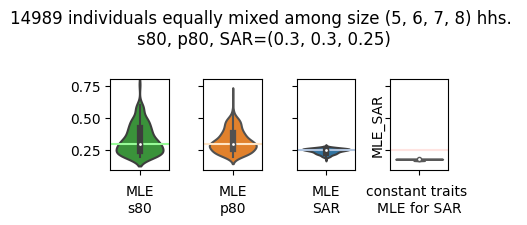

<Figure size 432x288 with 0 Axes>

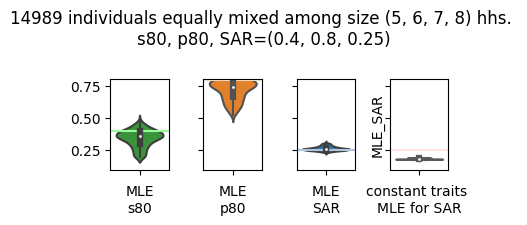

<Figure size 432x288 with 0 Axes>

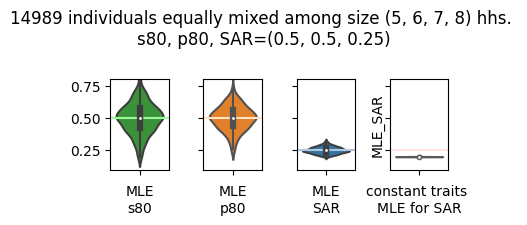

<Figure size 432x288 with 0 Axes>

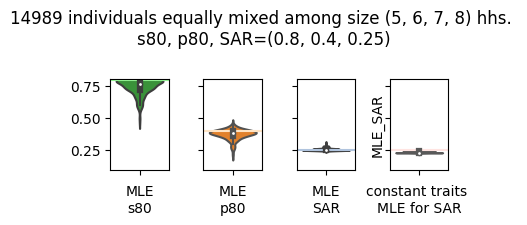

<Figure size 432x288 with 0 Axes>

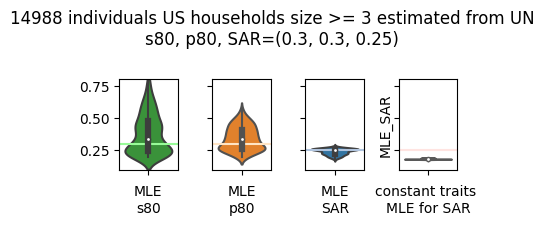

<Figure size 432x288 with 0 Axes>

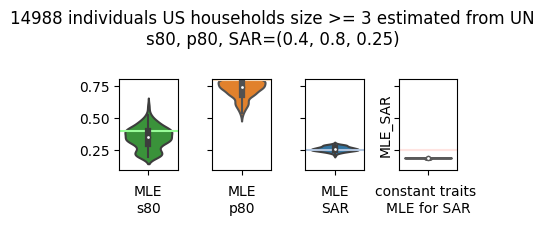

<Figure size 432x288 with 0 Axes>

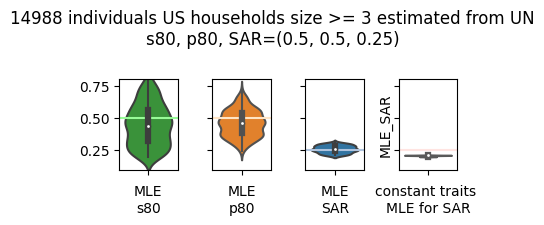

<Figure size 432x288 with 0 Axes>

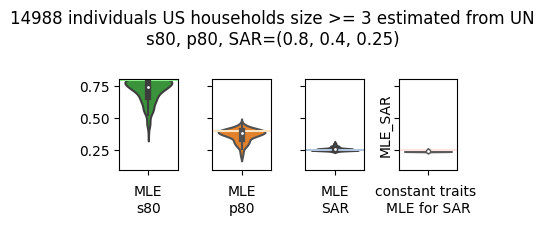

<Figure size 432x288 with 0 Axes>

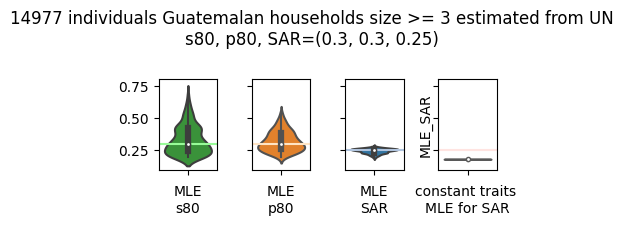

<Figure size 432x288 with 0 Axes>

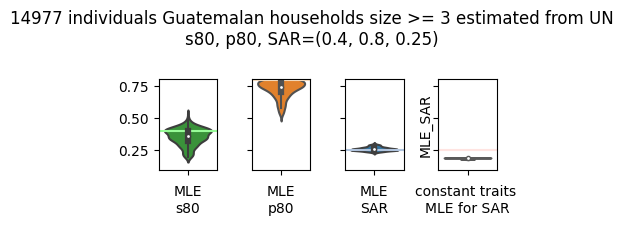

<Figure size 432x288 with 0 Axes>

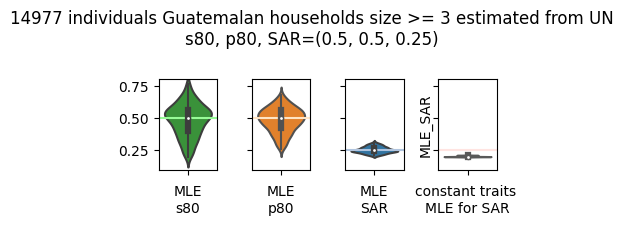

<Figure size 432x288 with 0 Axes>

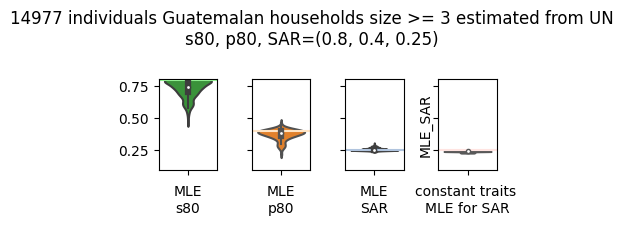

<Figure size 432x288 with 0 Axes>

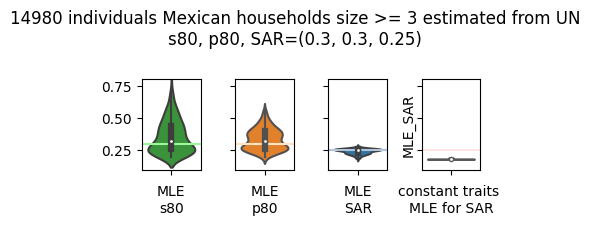

<Figure size 432x288 with 0 Axes>

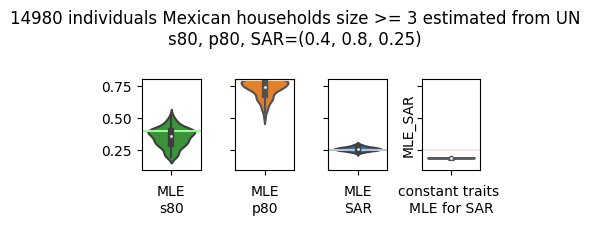

<Figure size 432x288 with 0 Axes>

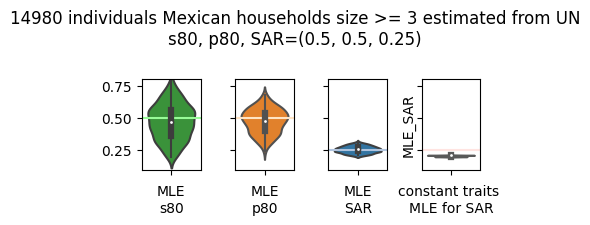

<Figure size 432x288 with 0 Axes>

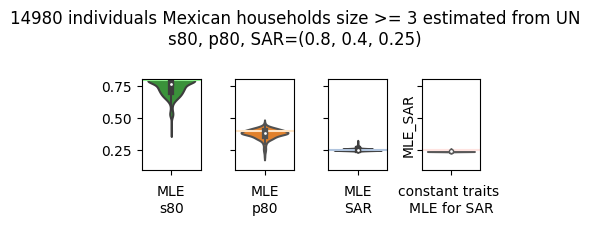

<Figure size 432x288 with 0 Axes>

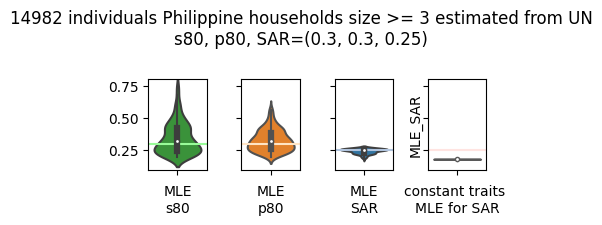

<Figure size 432x288 with 0 Axes>

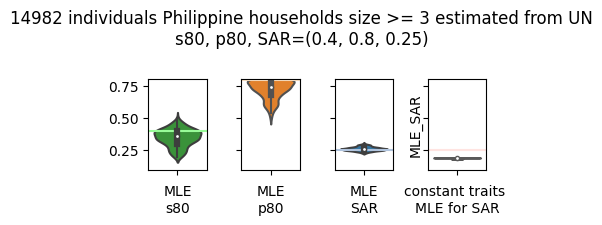

<Figure size 432x288 with 0 Axes>

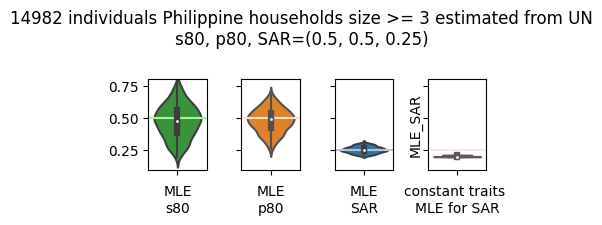

<Figure size 432x288 with 0 Axes>

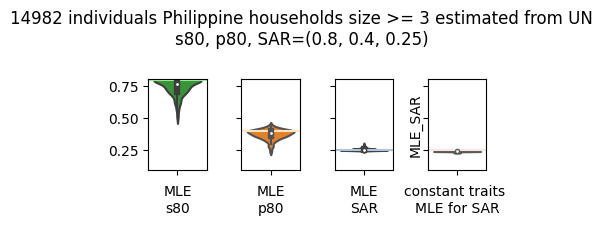

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.close('all')


dpi = 100
save_figs = False

fig_sizes = {'small':(4,2.25), 'big':(8,4.5)}
chosen_size = 'small'

#%matplotlib agg
min_dict = {0.6: 0.3, 0.4:0.10, 0.5: 0.15, 0.8: 0.5}
max_dict = {0.6: 0.8, 0.4:0.65, 0.5: 0.8, 0.8: 0.8}
colors = ['tab:green', 'tab:orange', 'tab:blue']
axline_colors = ['palegreen', 'bisque', 'lightsteelblue']
xlabels = ['MLE\ns80', 'MLE\np80', 'MLE\nSAR', 'constant traits \nMLE for SAR']
grouping =['population mix', 'sample size', 'parameters']
for k,g in fit_df.groupby(grouping):
    plt.figure()
    fig, axes = plt.subplots(1,4, dpi=dpi, sharey=True, figsize=fig_sizes[chosen_size])

    population_mix, sample_size, parameters = k
    population_name = None
    if isinstance(population_mix, str):
        population_name = population_mix
        description = population_descriptions[population_mix]
    else:
        description = 'equally mixed'
    if population_name:
        plt.suptitle(f"{sample_size} individuals {description}\ns80, p80, SAR={parameters}")
    else:
        plt.suptitle(f"{sample_size} individuals {description} among size {population_mix} hhs. \ns80, p80, SAR={parameters}")
    i = 0
    for c in g.columns:
        if 'MLE' not in c:
            continue
        if 's80' in c or 'p80' in c:
            parameter_index = 0 if 's80' in c else 1
            #mi, ma = min_dict[parameters[parameter_index]], max_dict[parameters[parameter_index]]
            mi, ma = 0.1, 0.8
            axes[i].set_ylim(mi, ma)
        if 'SAR' in c:
            pass
            #axes[i].set_ylim(0.1, 0.5)
            axes[i].set_ylim(0.1, 0.8)
        if parameters[i] == 0.8:
            axes[i].axhline(0.795, color=axline_colors[i])
        else:
            axes[i].axhline(parameters[i], color=axline_colors[i])
        sns.violinplot(y=c, data=g, ax=axes[i], orient="v", color=colors[i])
        axes[i].set(xlabel=xlabels[i], ylabel='')
        i += 1
    null_fit_slice = null_fit_df.groupby(['population mix', 'sample size', 'parameters']).get_group(k)
    #axes[3].set_ylim(0.1, 0.5)
    axes[3].set_ylim(0.1, 0.8)
    # plot the true SAR on the null hypothesis SAR
    axes[3].axhline(parameters[2], color='mistyrose')
    axes[3].set(xlabel=xlabels[3], ylabel='')
    sns.violinplot(y=null_fit_slice['MLE_SAR'], data=null_fit_slice, ax=axes[3], orient="v", color='indianred')
    #axes[3].set(ylabel='MLE of SAR assuming no heterogeneity')
    fig.tight_layout()
    if save_figs:
        plt.savefig(os.path.join('/Users/thayer/covid_households/batched_figs', f'{k}' + '.jpg'))

In [47]:
fit_df

,trial,MLE_s80,MLE_p80,MLE_SAR,sample size,population mix,parameters,p80_interval,s80_interval,SAR_interval
0,0,0.50,0.44,0.24,989,"(5, 6, 7, 8)","(0.5, 0.5, 0.25)","(0.2, 0.8)","(0.2, 0.8)","(0.16, 0.35)"
1,1,0.30,0.40,0.27,989,"(5, 6, 7, 8)","(0.5, 0.5, 0.25)","(0.2, 0.8)","(0.2, 0.8)","(0.16, 0.34)"
2,2,0.30,0.36,0.31,989,"(5, 6, 7, 8)","(0.5, 0.5, 0.25)","(0.2, 0.8)","(0.2, 0.8)","(0.18, 0.38)"
3,3,0.80,0.66,0.19,989,"(5, 6, 7, 8)","(0.5, 0.5, 0.25)","(0.2, 0.8)","(0.2, 0.8)","(0.15, 0.33)"
4,4,0.28,0.36,0.29,989,"(5, 6, 7, 8)","(0.5, 0.5, 0.25)","(0.2, 0.8)","(0.2, 0.8)","(0.18, 0.36)"
...,...,...,...,...,...,...,...,...,...,...
95,95,0.36,0.68,0.26,11981,Guatemala,"(0.4, 0.8, 0.25)","(0.46, 0.8)","(0.2, 0.54)","(0.21, 0.31)"
96,96,0.40,0.72,0.25,11981,Guatemala,"(0.4, 0.8, 0.25)","(0.5, 0.8)","(0.2, 0.56)","(0.21, 0.3)"
97,97,0.20,0.56,0.29,11981,Guatemala,"(0.4, 0.8, 0.25)","(0.46, 0.8)","(0.2, 0.48)","(0.22, 0.31)"
98,98,0.40,0.78,0.25,11981,Guatemala,"(0.4, 0.8, 0.25)","(0.48, 0.8)","(0.2, 0.52)","(0.22, 0.31)"


In [45]:
population_mixes

[(5, 6, 7, 8), 'America_UN', 'Mexico', 'Philippines', 'Guatemala']

/var/folders/9w/8b0b4bqn1vv4gl40h13fzdr40000gn/T/ipykernel_97941/1012137525.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

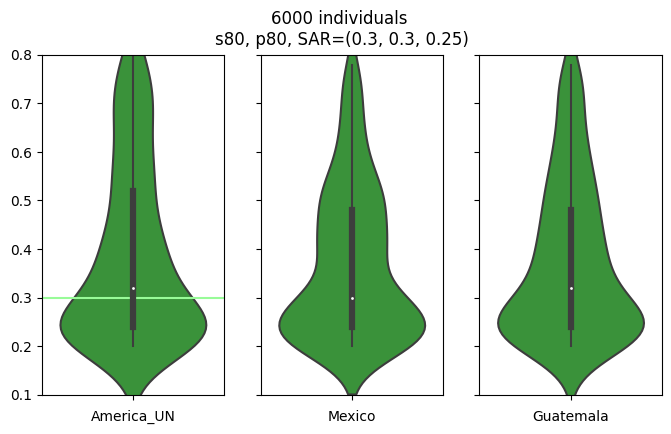

<Figure size 432x288 with 0 Axes>

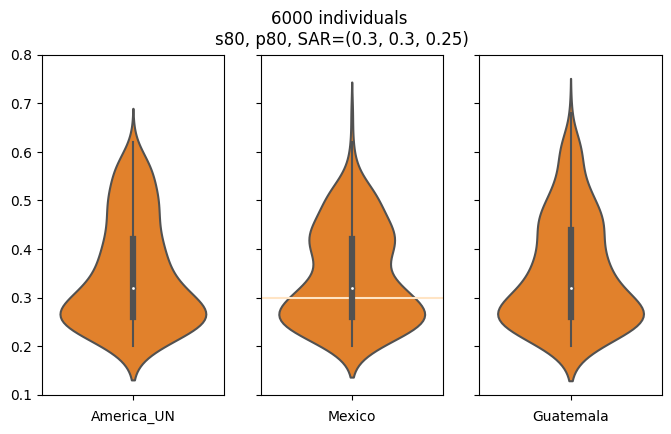

<Figure size 432x288 with 0 Axes>

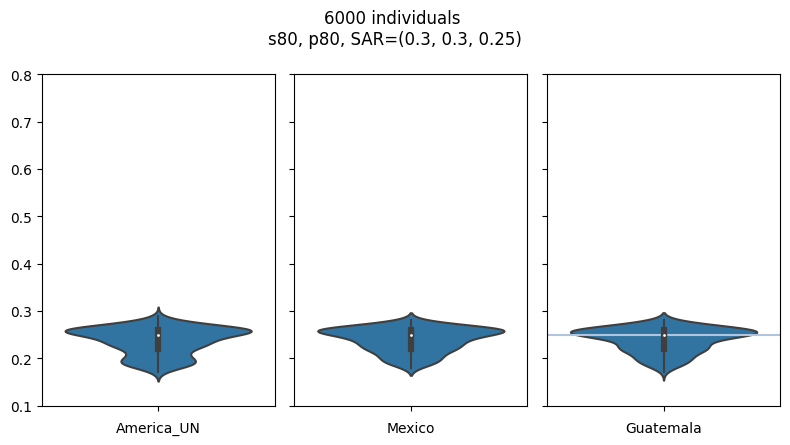

<Figure size 432x288 with 0 Axes>

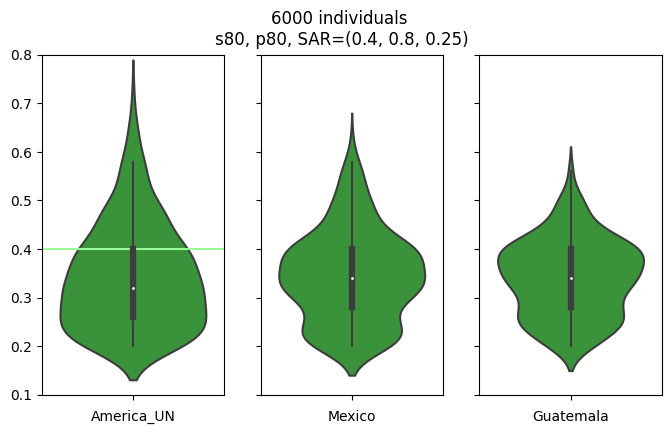

<Figure size 432x288 with 0 Axes>

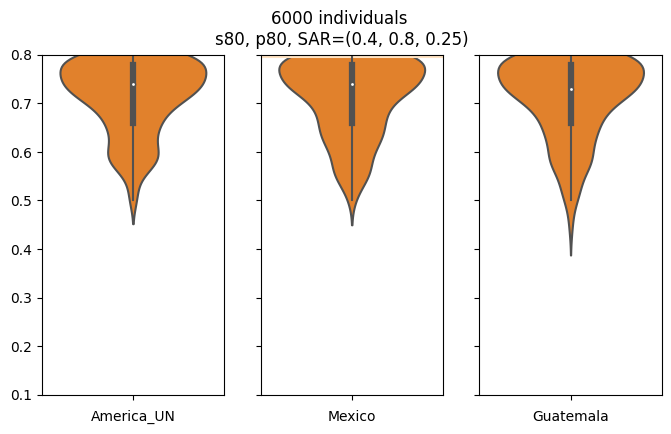

<Figure size 432x288 with 0 Axes>

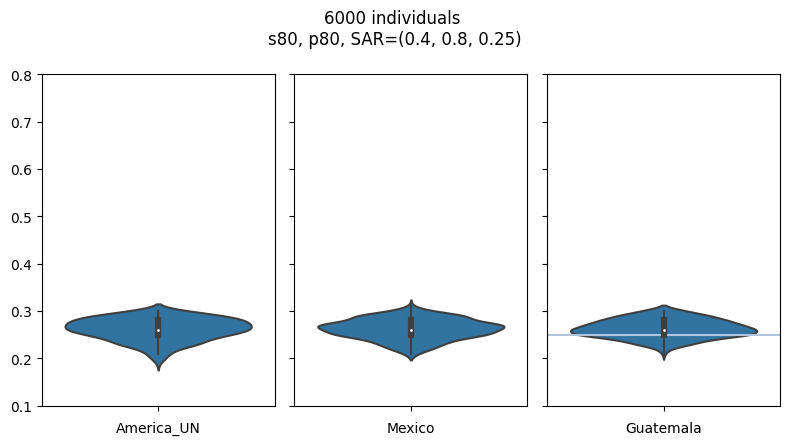

<Figure size 432x288 with 0 Axes>

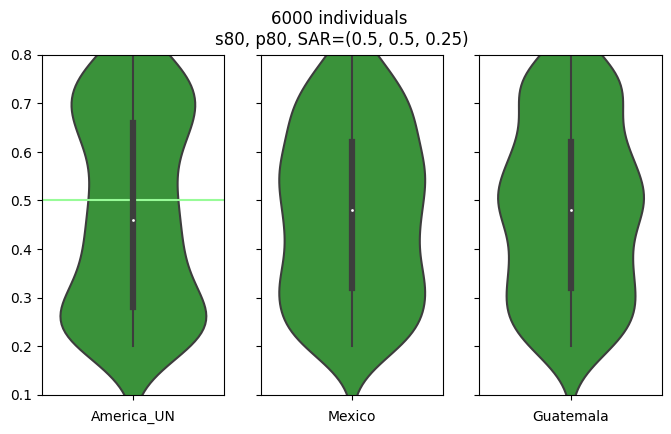

<Figure size 432x288 with 0 Axes>

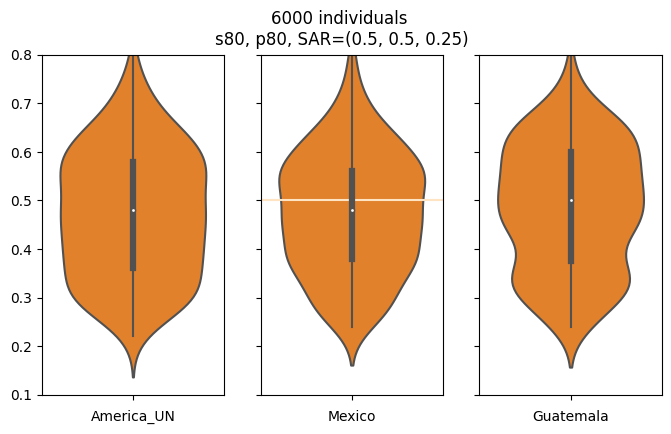

<Figure size 432x288 with 0 Axes>

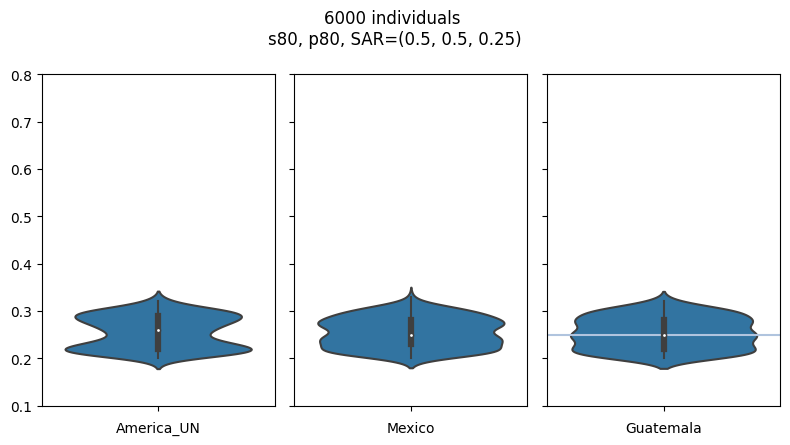

<Figure size 432x288 with 0 Axes>

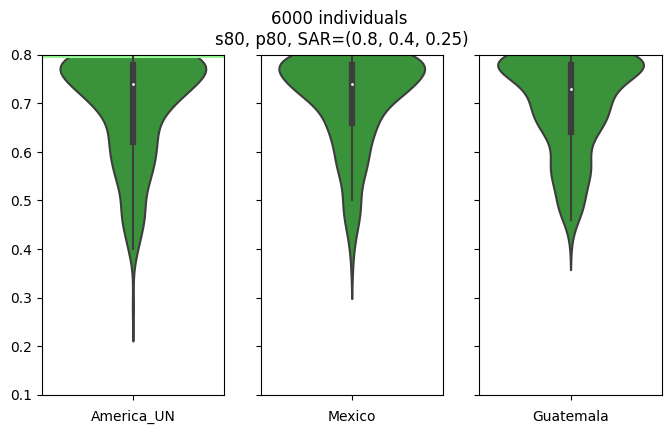

<Figure size 432x288 with 0 Axes>

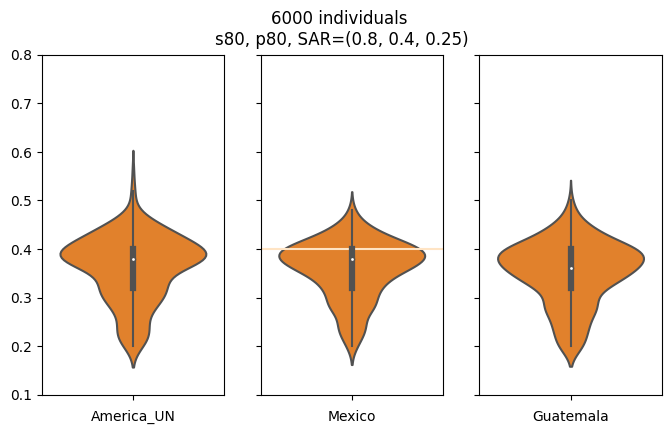

<Figure size 432x288 with 0 Axes>

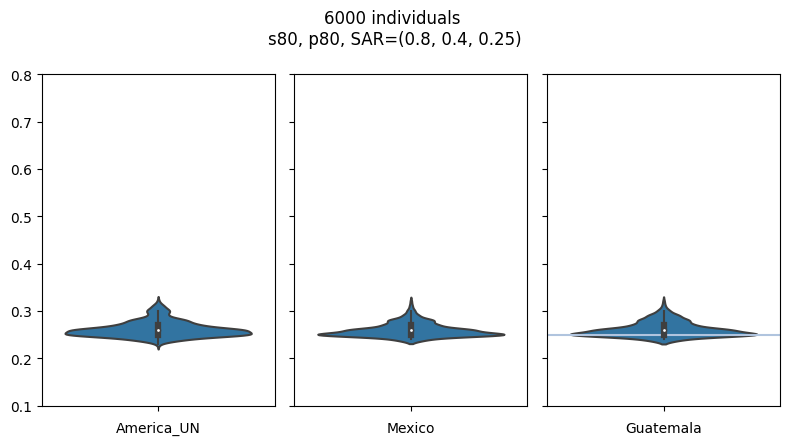

<Figure size 432x288 with 0 Axes>

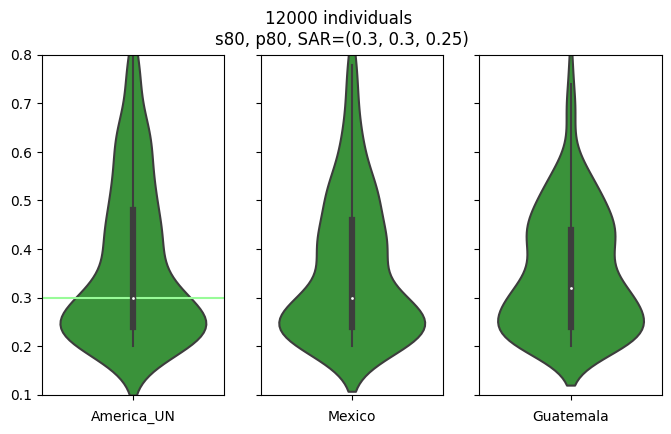

<Figure size 432x288 with 0 Axes>

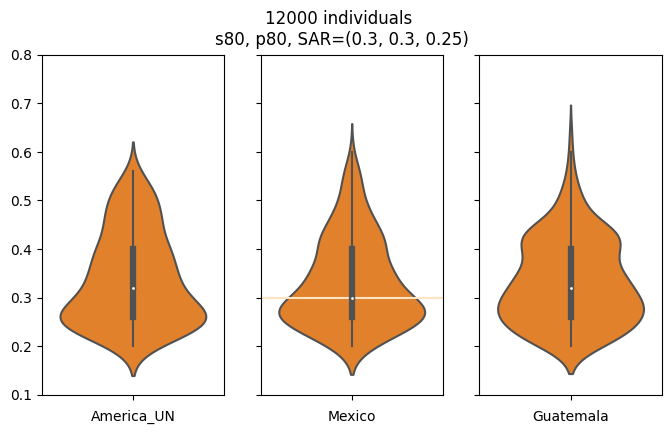

<Figure size 432x288 with 0 Axes>

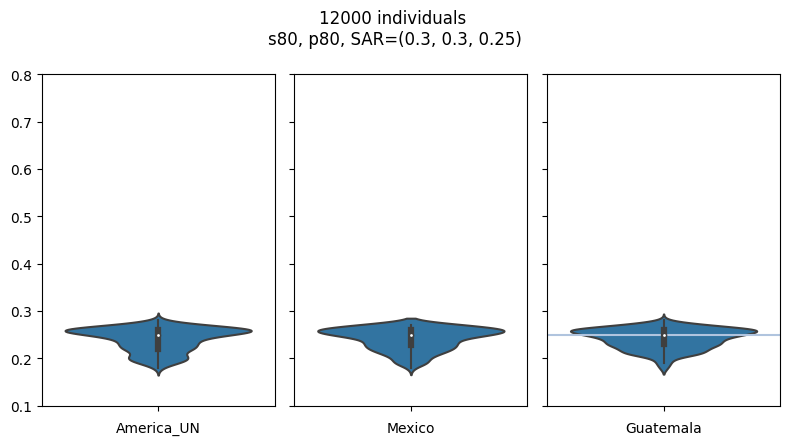

<Figure size 432x288 with 0 Axes>

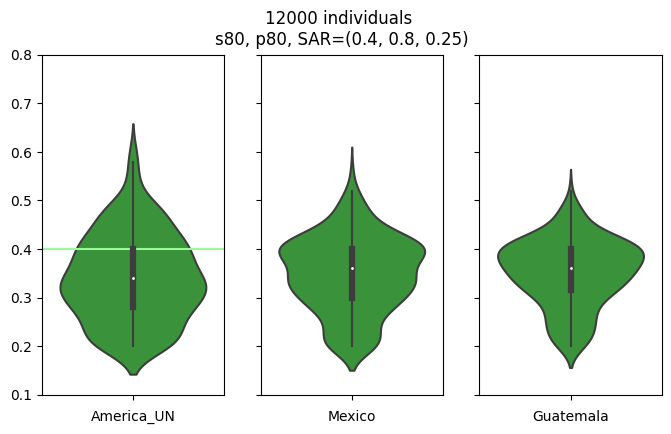

<Figure size 432x288 with 0 Axes>

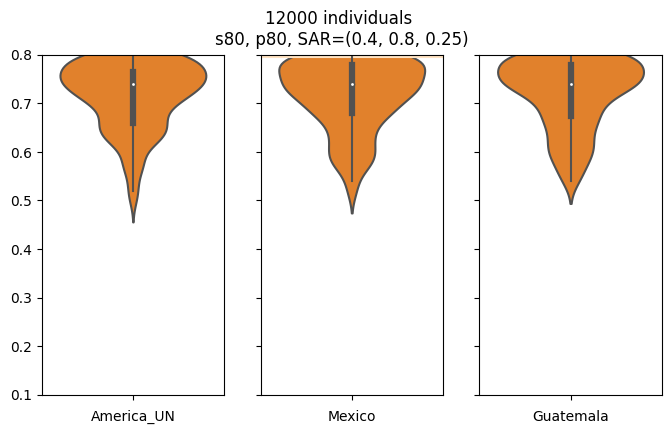

<Figure size 432x288 with 0 Axes>

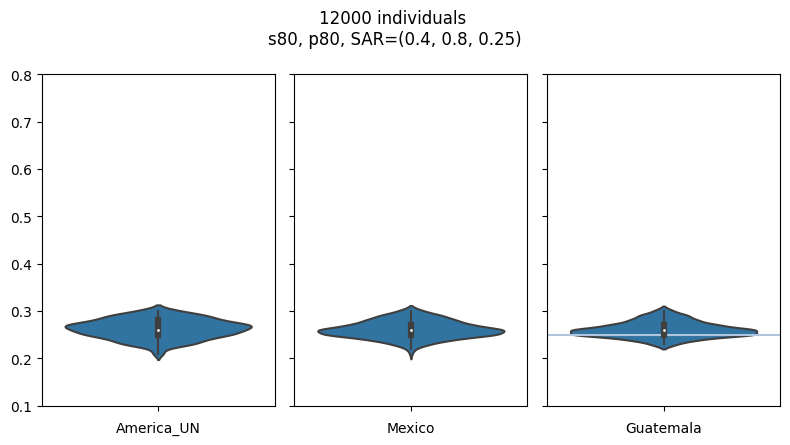

<Figure size 432x288 with 0 Axes>

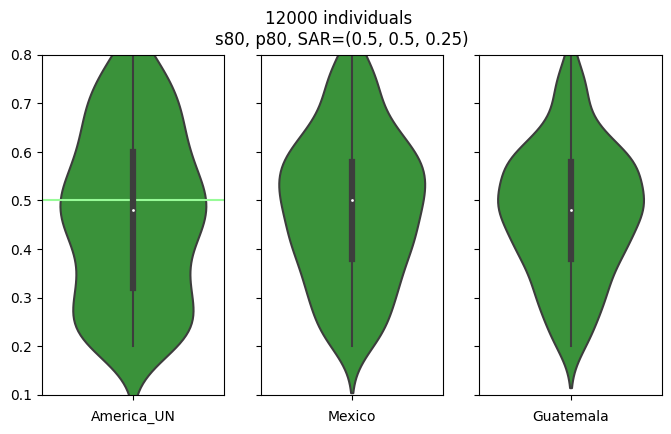

<Figure size 432x288 with 0 Axes>

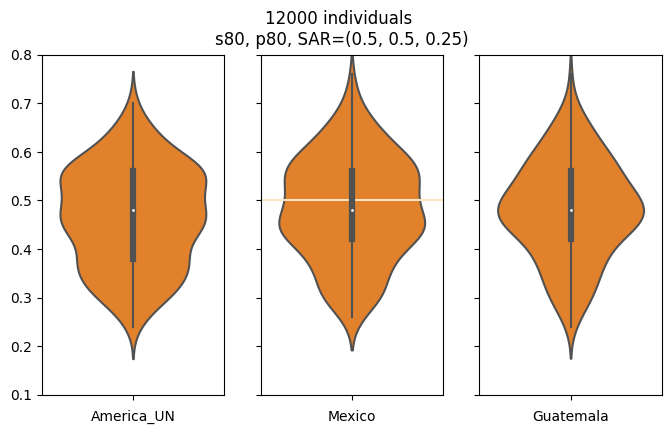

<Figure size 432x288 with 0 Axes>

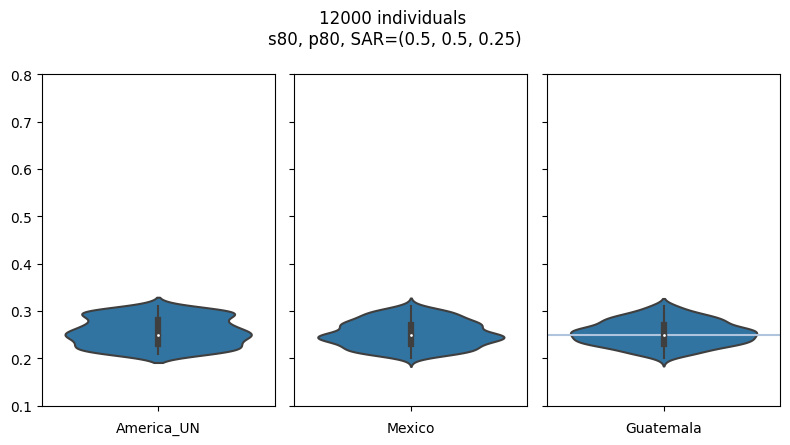

<Figure size 432x288 with 0 Axes>

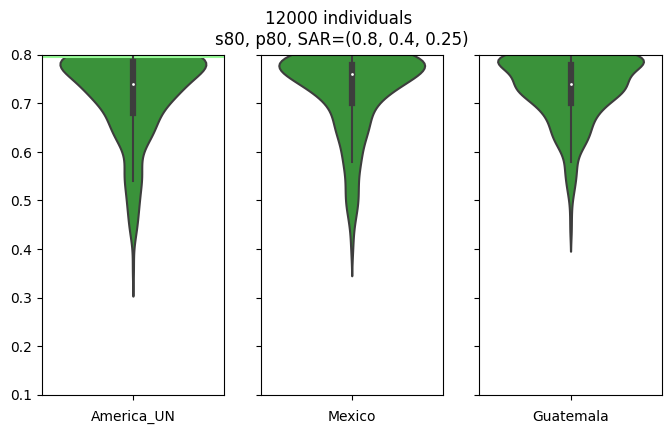

<Figure size 432x288 with 0 Axes>

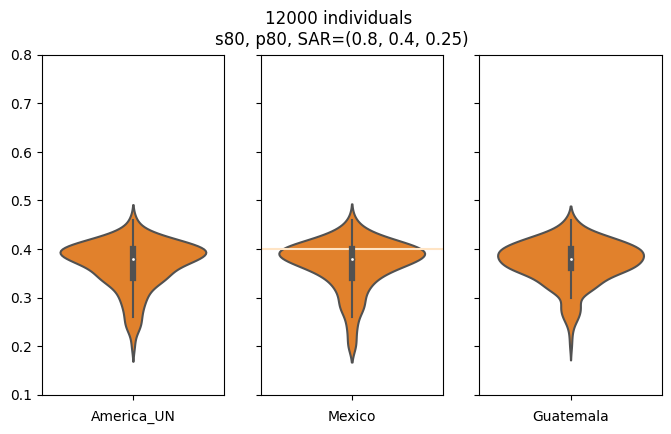

<Figure size 432x288 with 0 Axes>

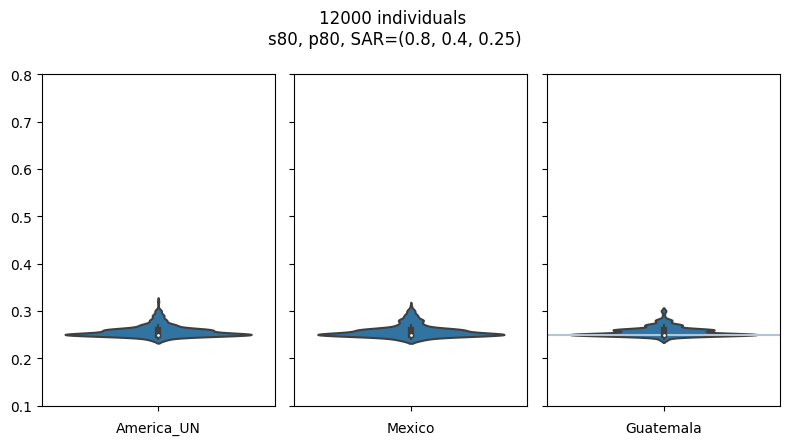

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.close('all')

dpi = 100
save_figs = False

fig_sizes = {'small':(4,2.25), 'big':(8,4.5)}
chosen_size = 'big'

#%matplotlib agg
min_dict = {0.6: 0.3, 0.4:0.10, 0.5: 0.15, 0.8: 0.5}
max_dict = {0.6: 0.8, 0.4:0.65, 0.5: 0.8, 0.8: 0.8}
colors = ['tab:green', 'tab:orange', 'tab:blue']
axline_colors = ['palegreen', 'bisque', 'lightsteelblue']
xlabels = ['MLE\ns80', 'MLE\np80', 'MLE\nSAR', 'constant traits \nMLE for SAR']
grouping=['written sample size', 'parameters']

drop_rules = {
    'population mix': [(5,6,7,8), 'Philippines'],
    'written sample size': [1000],
}
ordered_included_pops = ['America_UN', 'Mexico', 'Guatemala']

new_fit_df = fit_df.copy()
for column,exclusions in drop_rules.items():
    for exclusion in exclusions:
        new_fit_df = new_fit_df[new_fit_df[column] != exclusion]

for key,group in new_fit_df.groupby(grouping):
    sample_size, parameters = key
    for param_index,parameter in enumerate(results.metadata.parameters):
        plt.figure()
        fig, axes = plt.subplots(1,len(ordered_included_pops), dpi=dpi, sharey=True, figsize=fig_sizes[chosen_size])
        plt.suptitle(f"{sample_size} individuals \ns80, p80, SAR={parameters}")

        mi, ma = 0.1, 0.8
        if parameters[param_index] == 0.8:
            axes[param_index].axhline(0.795, color=axline_colors[param_index])
        else:
            axes[param_index].axhline(parameters[param_index], color=axline_colors[param_index])

        by_population = group.groupby('population mix')
        i = 0
        for population in ordered_included_pops:
            mix = population
            subgroup = by_population.get_group(mix)
            sns.violinplot(y=f'MLE_{parameter}', data=subgroup, ax=axes[i], orient="v", color=colors[param_index])
            axes[i].set(xlabel=mix, ylabel='')
            axes[i].set_ylim(mi, ma)
            i += 1
    fig.tight_layout()
    if save_figs:
        plt.savefig(os.path.join('/Users/thayer/covid_households/batched_figs', f'{k}' + '.jpg'))

In [ ]:
fit_df

In [ ]:
relevant_data = fit_df[(fit_df['population mix'] == (4,5,6,7,8)) & (fit_df['parameters'] == (0.4, 0.8, 0.25))]

import matplotlib.pyplot as plt
import seaborn as sns
sns.catplot(x='sample size', y='MLE_p80', kind='swarm', data=relevant_data, s=3)
plt.ylim((0.1, 0.8))

In [ ]:
null_fits = null_fit_df['MLE_SAR'].copy()
null_fits.name = 'No traits \n MLE for SAR'
version_2_df = pd.concat([fit_df, null_fits], axis=1)

params = ['population mix', 'sample size', 'parameters']
for k,g in version_2_df.groupby(params):
    data = g.drop(params, axis=1)
    plt.figure(dpi=800)
    fig = sns.violinplot(data=data)
    fig.set_ylim(0.1, 0.8)
    plt.savefig(os.path.join('/Users/thayer/covid_households/batched_figs', 'v2' + f'{k}' + '.jpg'))
    break

In [ ]:
means = fit_df.groupby(['population mix', 'sample size', 'parameters']).mean()
stds = fit_df.groupby(['population mix', 'sample size', 'parameters']).std()
stds.columns = ['STD_' + s for s in stds.columns]

statistics = pd.concat([means, stds], axis=1)
with open('/Users/thayer/covid_households/batched_figs/stats.csv', 'w') as f:
    statistics.to_csv(f)

In [ ]:
stds.sort_values(by='STD_MLE_s80')
with open('/Users/thayer/covid_households/batched_figs/stds.csv', 'w') as f:
    stds.to_csv(f)

with open('/Users/thayer/covid_households/batched_figs/means.csv', 'w') as f:
    means.to_csv(f)

# Power calculation

In [ ]:
population = {4:100}
basline_parameters = (0.5, 0.5, 0.2)
sar_range = np.linspace(0.25, 0.51, 14)
trials = 500

pvalues = []
for sar in sar_range:
    pvalues_for_one_sar = []
    # replace baseline sar with target sar
    parameters = list(basline_parameters)
    parameters[2] = float(f'{sar:0.3f}')
    parameters = tuple(parameters)
    print(parameters)
    for t in range(trials):
        samples = results.resample(basline_parameters, population, trials=1)
        baseline_logl = likelihood.logl_from_frequencies_and_counts(results.df['frequency'], samples['count'], results.metadata.parameters, sample_only_keys=['trial'])
        posterior = np.exp(baseline_logl.sort_values(ascending=False)-baseline_logl.max())
        posterior = posterior/posterior.sum()
        baseline_probability_over_sars = posterior.groupby('SAR').sum()

        samples = results.resample(parameters, population, trials=1)
        logl = likelihood.logl_from_frequencies_and_counts(results.df['frequency'], samples['count'], results.metadata.parameters, sample_only_keys=['trial'])
        posterior = np.exp(logl.sort_values(ascending=False)-logl.max())
        posterior = posterior/posterior.sum()
        probability_over_sars = posterior.groupby('SAR').sum()

        sample1 = np.random.choice(baseline_probability_over_sars.index, 10000, p=baseline_probability_over_sars)
        sample2 = np.random.choice(probability_over_sars.index, 10000, p=probability_over_sars)

        pvalue = np.count_nonzero((sample1-sample2) < 0)/len(sample1)
        pvalues_for_one_sar.append(pvalue)
    pvalues.append(pvalues_for_one_sar)

In [ ]:
pvalue_df = pd.DataFrame(pvalues, index=[float(f'{sar:0.3f}') for sar in sar_range]).transpose()
pvalue_df

In [ ]:
power90 = ((pvalue_df > 0.90).sum()/trials)#.plot()
power90.name = 'power p=0.9'

In [ ]:
power95 = (pvalue_df > 0.95).sum()/trials
power95.name = 'power p=0.95'

In [ ]:
import matplotlib.pyplot as plt
power_df = pd.concat([power90, power95], axis=1)
power_df.plot()
plt.xlabel('SAR in heightened group')

In [ ]:
brendan_fit_df = pd.concat(brendan_fit_dfs)

In [ ]:
clusters = []
for k,g in brendan_fit_df.groupby('parameters'):
    clusters.append(g)

In [ ]:
((clusters[0]['MLE_SAR'] + 0.1) < clusters[1]['MLE_SAR']).value_counts()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
plt.close('all')
#%matplotlib agg
min_dict = {0.6: 0.3, 0.4:0.10, 0.5: 0.15, 0.8: 0.5}
max_dict = {0.6: 0.8, 0.4:0.65, 0.5: 0.8, 0.8: 0.8}
colors = ['tab:green', 'tab:orange', 'tab:blue']
axline_colors = ['palegreen', 'bisque', 'lightsteelblue']
xlabels = ['MLE\ns80', 'MLE\np80', 'MLE\nSAR', 'constant traits \nMLE for SAR']
for k,g in brendan_fit_df.groupby(['population mix', 'sample size', 'parameters']):
    plt.figure()
    fig, axes = plt.subplots(1,3, dpi=800, sharey=True)
    print(k)
    print(g.mean())
    population_mix, sample_size, parameters = k
    plt.suptitle(f"{sample_size} individuals equally mixed among size {population_mix} hhs. \ns80, p80, SAR={parameters}")
    i = 0
    for c in g.columns:
        if 'MLE' not in c:
            continue
        if 's80' in c or 'p80' in c:
            parameter_index = 0 if 's80' in c else 1
            mi, ma = 0.1, 0.8
            axes[i].set_ylim(mi, ma)
        if 'SAR' in c:
            pass
            #axes[i].set_ylim(0.1, 0.5)
            axes[i].set_ylim(0.1, 0.8)
        if parameters[i] == 0.8:
            axes[i].axhline(0.795, color=axline_colors[i])
        else:
            axes[i].axhline(parameters[i], color=axline_colors[i])
        sns.violinplot(y=c, data=g, ax=axes[i], orient="v", color=colors[i])
        axes[i].set(xlabel=xlabels[i], ylabel='')
        i += 1

    fig.tight_layout()
    plt.savefig(os.path.join('/Users/thayer/covid_households/batched_figs/brendan', f'{k}' + '.jpg'))
    #break
    #input()

In [ ]:
import numpy as np
expected_s80s = np.linspace(0.1, 0.8, 36)
expected_p80s = np.linspace(0.1, 0.8, 36)
expected_SARs = np.linspace(0.15, 0.40, 26)

decimal_places = 3

for s80, p80, SAR in zip(expected_s80s, expected_p80s, expected_SARs):
    # touch everything in the convex area that we expect to exist
    results.df.loc[float(f"{s80:.{decimal_places}f}"), float(f"{p80:.{decimal_places}f}"), float(f"{SAR:.{decimal_places}f}")]
    #print(results.df.loc[float(f"{s80:.{decimal_places}f}"), float(f"{p80:.{decimal_places}f}"), float(f"{SAR:.{decimal_places}f}")])
    #break